# Regression of Used Car Prices Dataset
Run after following notebooks are run:
1. **01 Data Cleaning**

## Development Notes/Ideas

## Libraries

In [1]:
## libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # Used for Cramer's V computation

## Load Data

In [2]:
train = pd.read_pickle('train_clean.pkl')

## Univariate Analysis
First, we look at the distribution of the target variable: price
- Heavily right skewed

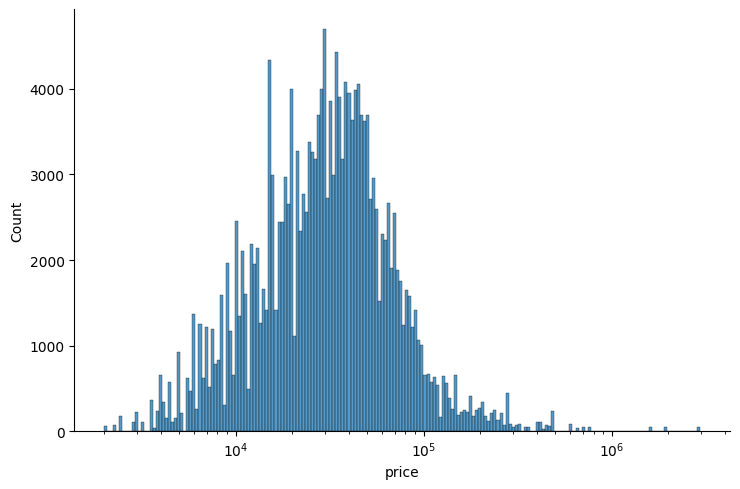

In [3]:
## histogram of Rings
g=sns.displot(data=train, x='price', aspect=1.5, log_scale=True)

### Numerical Variables
Observations
- Numerical variables don't, by themselves, don't seem predictive
- A weak positive relationship exists of most numerical, except milage which has a weak negative relationship

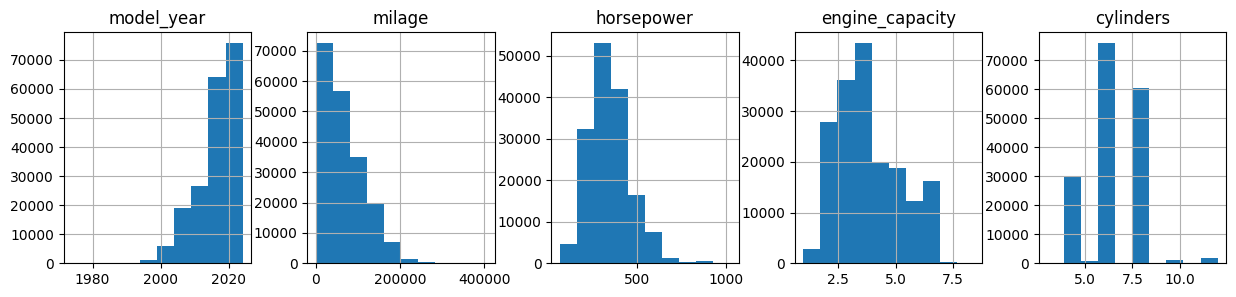

In [4]:
## histogram of all numerical variables
train.drop('price', axis=1).hist(figsize=(15,3), layout=(-1,5))
None

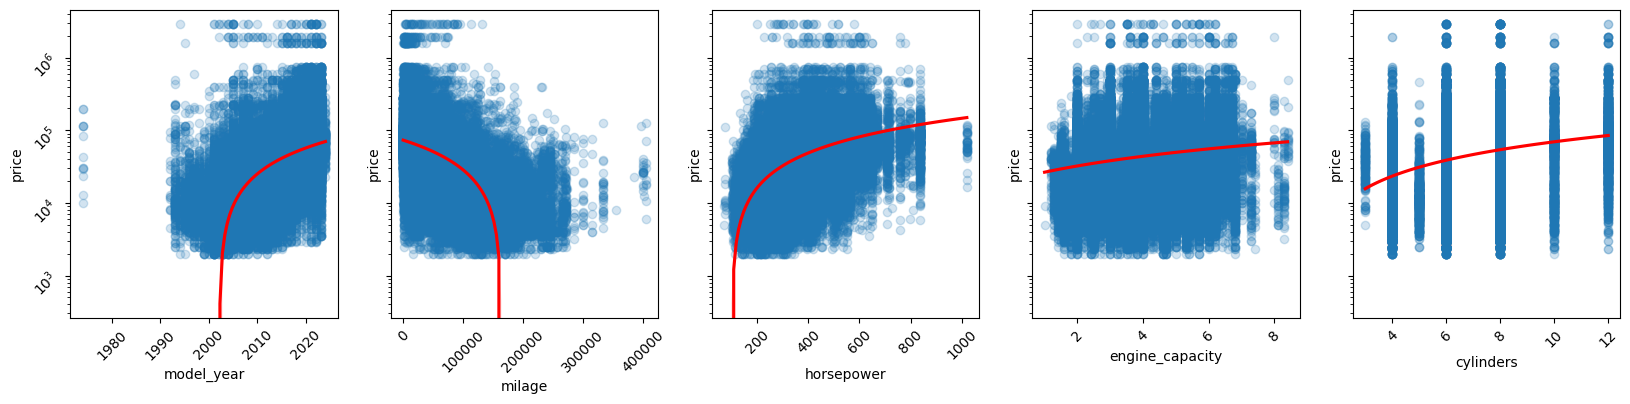

In [5]:
## list all numerical variables
cols_num = train.columns[(train.dtypes!='category')&(train.dtypes!='bool')].to_list()
cols_num.remove('price')

## set up grid of subplots, then fill with pointplots
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(20,4), sharey=True)
for i, col in enumerate(cols_num):
    ax = axes.ravel()[i]
    # sns.scatterplot(data=train, x=col, y='price', ax=ax, alpha=0.2)
    sns.regplot(data=train, x=col, y='price', ax=ax, line_kws=dict(color="r"), scatter_kws=dict(alpha=0.2))
    ax.set_yscale('log')
    ax.tick_params(labelrotation=45)

### Categorical Variables
- Electric and Hybrid are on average more expensive
- No accident on avereage more expensive
- Non-clean title is on average more expensive - this is counter intuitive but maybe due to correlation with other variables

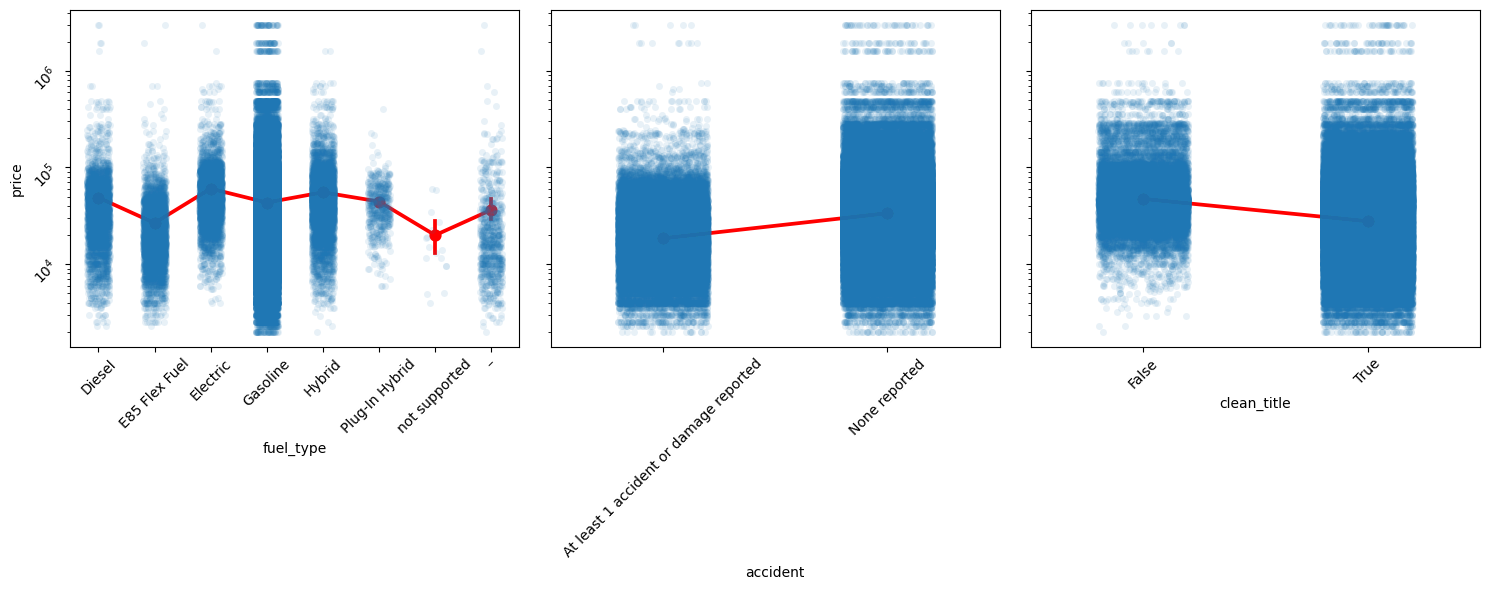

In [6]:
## list of all categorical variables with a reasonable number of categories
cols_cat = ['fuel_type', 'accident', 'clean_title']

## set up grid of subplots, then fill it with scatterplots of variable vs Rings
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,6), sharey=True)
for i, col in enumerate(cols_cat):
    ax = axes.ravel()[i]
    g1=sns.stripplot(data=train, ax=ax, x=col, y='price', alpha=0.1, jitter=0.2)
    # g2=sns.violinplot(data=train, ax=ax, x=col, y='price')
    g3=sns.pointplot(data=train, ax=ax, x=col, y='price', estimator='mean', color='red')
    ax.set_yscale('log')
    ax.tick_params(rotation=45)
plt.tight_layout()